### Stacking Ensemble - Blending
Assuming we have $n$ models and the reconstructed matrix by the
$i$-th model is denoted by $\hat{A}$, the final prediction would be
$$\hat{A} = w_0 + \sum_{i=1}^{n}w_i \hat{A}^i$$

$\hat{A}^i$ fixed, only learn $w_i$ for $i = 0, 1, ..., n$

We split the data into training and holdout set (say 95% - 5%, or try different split ratios). The level-0 $n$ models are trained on the training set. The weights $w_i$ of the level-1 ensemble model are then learned on the holdout set.

In [1]:
# model-1: SVP
# model-2: Regularized SVD
# model-3: KMEANS
import numpy as np
import pandas as pd
n = 3 # number of models
data = pd.read_csv("./data/data_train.csv")
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Id,Prediction
0,r8706_c445,5
1,r8995_c114,5
2,r7079_c322,5
3,r7013_c685,4
4,r5449_c703,4


In [2]:
users, movies = \
        [np.squeeze(arr) for arr in \
        np.split(data.Id.str.extract("r(\d+)_c(\d+)").values.astype(int) - 1, 2, axis=-1)]
predictions = data.Prediction.values
predictions = predictions.astype('float')

In [3]:
train_size = int(0.95 * users.shape[0])
A = np.full((10000, 1000), 0)
for user , movie , pred in zip(users[:train_size], movies[:train_size], predictions[:train_size]):
    A[user][movie] = pred
W = (A > 0).astype(int)
import utils
norm_A, mean_A, stddev_A = utils.zscore_masked_items(A, W)

In [4]:
sample_pd = pd.read_csv("./data/sampleSubmission.csv")
test_users, test_movies = \
    [np.squeeze(arr) for arr in \
    np.split(sample_pd.Id.str.extract("r(\d+)_c(\d+)").values.astype(int) - 1, 2, axis=-1)]

In [5]:
## Ensemble
## Assume rec_A is given
y_val = predictions[train_size:] #target of the ensemble
X_ensemble = np.ones((1,y_val.shape[0]))
raw_preds = np.empty((test_users.shape[0], 25),dtype=float)
import svp
for k in range(25):
    A_t = svp.svp(norm_A, W, k) #np.random.rand(10000,1000)
    rec_A = A_t
    #undo normalization
    for j in range(1000):
        rec_A[:,j] *= stddev_A[j]
        rec_A[:,j] += mean_A[j]
    raw_preds[:,k] = rec_A[test_users, test_movies]
    y_pred = rec_A[users[train_size:], movies[train_size:]]
    X_ensemble = np.vstack([X_ensemble, y_pred])

print(X_ensemble.shape)
X_ensemble = X_ensemble.T


 20%|██        | 1/5 [00:01<00:07,  1.80s/it]

k =  0 , RMSE =  0.9705209613487024


 40%|████      | 2/5 [00:03<00:05,  1.73s/it]

k =  0 , RMSE =  0.9343105033912471


 60%|██████    | 3/5 [00:05<00:03,  1.71s/it]

k =  0 , RMSE =  0.9262389335433344


 80%|████████  | 4/5 [00:06<00:01,  1.72s/it]

k =  0 , RMSE =  0.9255703430477821


100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


k =  0 , RMSE =  0.9253367034233949


 20%|██        | 1/5 [00:01<00:06,  1.67s/it]

k =  1 , RMSE =  0.9629975952849014


 40%|████      | 2/5 [00:03<00:05,  1.88s/it]

k =  1 , RMSE =  0.9202563341302772


 60%|██████    | 3/5 [00:05<00:04,  2.06s/it]

k =  1 , RMSE =  0.9005681716650458


 80%|████████  | 4/5 [00:08<00:02,  2.11s/it]

k =  1 , RMSE =  0.8994915911474853


100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


k =  1 , RMSE =  0.8991095253046886


 20%|██        | 1/5 [00:02<00:08,  2.20s/it]

k =  2 , RMSE =  0.9586993810985195


 40%|████      | 2/5 [00:04<00:06,  2.19s/it]

k =  2 , RMSE =  0.9028058976580897


 60%|██████    | 3/5 [00:06<00:04,  2.21s/it]

k =  2 , RMSE =  0.8764920474289484


 80%|████████  | 4/5 [00:08<00:02,  2.20s/it]

k =  2 , RMSE =  0.8751253333591392


100%|██████████| 5/5 [00:10<00:00,  2.17s/it]


k =  2 , RMSE =  0.8746421027490209


 20%|██        | 1/5 [00:01<00:07,  1.96s/it]

k =  3 , RMSE =  0.9626298875451936


 40%|████      | 2/5 [00:03<00:05,  1.99s/it]

k =  3 , RMSE =  0.9296286712036584


 60%|██████    | 3/5 [00:06<00:04,  2.01s/it]

k =  3 , RMSE =  0.8936851417202791


 80%|████████  | 4/5 [00:08<00:02,  2.02s/it]

k =  3 , RMSE =  0.8638088894459242


100%|██████████| 5/5 [00:10<00:00,  2.02s/it]


k =  3 , RMSE =  0.8623027467794279


 20%|██        | 1/5 [00:02<00:09,  2.45s/it]

k =  4 , RMSE =  0.9723299638549919


 40%|████      | 2/5 [00:04<00:06,  2.30s/it]

k =  4 , RMSE =  0.9947420020351895


 60%|██████    | 3/5 [00:06<00:04,  2.26s/it]

k =  4 , RMSE =  0.9494285996018642


 80%|████████  | 4/5 [00:08<00:02,  2.18s/it]

k =  4 , RMSE =  0.8544539293681293


100%|██████████| 5/5 [00:11<00:00,  2.24s/it]


k =  4 , RMSE =  0.8519978247262997


 20%|██        | 1/5 [00:02<00:08,  2.23s/it]

k =  5 , RMSE =  0.9765771567532608


 40%|████      | 2/5 [00:04<00:06,  2.31s/it]

k =  5 , RMSE =  1.0425274710803476


 60%|██████    | 3/5 [00:06<00:04,  2.22s/it]

k =  5 , RMSE =  0.9792480062175831


 80%|████████  | 4/5 [00:08<00:02,  2.18s/it]

k =  5 , RMSE =  0.8464679266817458


100%|██████████| 5/5 [00:10<00:00,  2.19s/it]


k =  5 , RMSE =  0.8431595813495755


 20%|██        | 1/5 [00:02<00:08,  2.02s/it]

k =  6 , RMSE =  0.9904443032837972


 40%|████      | 2/5 [00:04<00:06,  2.05s/it]

k =  6 , RMSE =  1.1537481798653058


 60%|██████    | 3/5 [00:06<00:04,  2.07s/it]

k =  6 , RMSE =  1.0749069614270552


 80%|████████  | 4/5 [00:08<00:02,  2.06s/it]

k =  6 , RMSE =  0.8407365056632944


100%|██████████| 5/5 [00:10<00:00,  2.05s/it]


k =  6 , RMSE =  0.8359785575244046


 20%|██        | 1/5 [00:02<00:08,  2.02s/it]

k =  7 , RMSE =  1.0123746222288992


 40%|████      | 2/5 [00:04<00:06,  2.05s/it]

k =  7 , RMSE =  1.308281203390199


 60%|██████    | 3/5 [00:06<00:04,  2.08s/it]

k =  7 , RMSE =  1.24732694956374


 80%|████████  | 4/5 [00:08<00:02,  2.10s/it]

k =  7 , RMSE =  0.8330740199432773


100%|██████████| 5/5 [00:10<00:00,  2.08s/it]


k =  7 , RMSE =  0.8274823462437322


 20%|██        | 1/5 [00:01<00:07,  1.95s/it]

k =  8 , RMSE =  1.0296547491035855


 40%|████      | 2/5 [00:04<00:06,  2.02s/it]

k =  8 , RMSE =  1.4237094579345906


 60%|██████    | 3/5 [00:06<00:04,  2.04s/it]

k =  8 , RMSE =  1.3600102702092083


 80%|████████  | 4/5 [00:08<00:02,  2.05s/it]

k =  8 , RMSE =  0.8297162544986002


100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


k =  8 , RMSE =  0.8250898418756075


 20%|██        | 1/5 [00:02<00:08,  2.02s/it]

k =  9 , RMSE =  1.0556165976029122


 40%|████      | 2/5 [00:04<00:06,  2.04s/it]

k =  9 , RMSE =  1.5941093449205093


 60%|██████    | 3/5 [00:06<00:04,  2.06s/it]

k =  9 , RMSE =  1.5319163875401098


 80%|████████  | 4/5 [00:08<00:02,  2.05s/it]

k =  9 , RMSE =  0.8237075093961719


100%|██████████| 5/5 [00:10<00:00,  2.05s/it]


k =  9 , RMSE =  0.8185131697716871


 20%|██        | 1/5 [00:01<00:07,  1.98s/it]

k =  10 , RMSE =  1.0868308718130006


 40%|████      | 2/5 [00:04<00:06,  2.01s/it]

k =  10 , RMSE =  1.8233782855828193


 60%|██████    | 3/5 [00:06<00:04,  2.05s/it]

k =  10 , RMSE =  1.795659007679255


 80%|████████  | 4/5 [00:08<00:02,  2.05s/it]

k =  10 , RMSE =  0.8111206171773455


100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


k =  10 , RMSE =  0.8042502875153762


 20%|██        | 1/5 [00:01<00:07,  1.97s/it]

k =  11 , RMSE =  1.1149977050678


 40%|████      | 2/5 [00:04<00:06,  2.02s/it]

k =  11 , RMSE =  1.9942930370314136


 60%|██████    | 3/5 [00:06<00:04,  2.05s/it]

k =  11 , RMSE =  1.9616570626051315


 80%|████████  | 4/5 [00:08<00:02,  2.08s/it]

k =  11 , RMSE =  0.8051206517937477


100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


k =  11 , RMSE =  0.7973417750698091


 20%|██        | 1/5 [00:02<00:08,  2.06s/it]

k =  12 , RMSE =  1.1387454518645836


 40%|████      | 2/5 [00:04<00:06,  2.08s/it]

k =  12 , RMSE =  2.161250253689814


 60%|██████    | 3/5 [00:06<00:04,  2.09s/it]

k =  12 , RMSE =  2.129678110600471


 80%|████████  | 4/5 [00:08<00:02,  2.16s/it]

k =  12 , RMSE =  0.8006008180928238


100%|██████████| 5/5 [00:10<00:00,  2.13s/it]


k =  12 , RMSE =  0.7925800126125835


 20%|██        | 1/5 [00:02<00:08,  2.03s/it]

k =  13 , RMSE =  1.1741050837538647


 40%|████      | 2/5 [00:04<00:06,  2.14s/it]

k =  13 , RMSE =  2.401559753096247


 60%|██████    | 3/5 [00:06<00:04,  2.13s/it]

k =  13 , RMSE =  2.382591083238734


 80%|████████  | 4/5 [00:08<00:02,  2.16s/it]

k =  13 , RMSE =  0.7975820238076535


100%|██████████| 5/5 [00:10<00:00,  2.13s/it]


k =  13 , RMSE =  0.7898232723440637


 20%|██        | 1/5 [00:02<00:08,  2.02s/it]

k =  14 , RMSE =  1.2153320258670848


 40%|████      | 2/5 [00:04<00:06,  2.06s/it]

k =  14 , RMSE =  2.687822991360046


 60%|██████    | 3/5 [00:06<00:04,  2.08s/it]

k =  14 , RMSE =  2.688681582215333


 80%|████████  | 4/5 [00:08<00:02,  2.07s/it]

k =  14 , RMSE =  0.786206044337197


100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


k =  14 , RMSE =  0.7772578951293496


 20%|██        | 1/5 [00:02<00:08,  2.10s/it]

k =  15 , RMSE =  1.249748142720784


 40%|████      | 2/5 [00:04<00:06,  2.12s/it]

k =  15 , RMSE =  2.9181474269928542


 60%|██████    | 3/5 [00:06<00:04,  2.15s/it]

k =  15 , RMSE =  2.928437299840666


 80%|████████  | 4/5 [00:08<00:02,  2.14s/it]

k =  15 , RMSE =  0.7818293168029535


100%|██████████| 5/5 [00:10<00:00,  2.12s/it]


k =  15 , RMSE =  0.7725588942880162


 20%|██        | 1/5 [00:01<00:07,  1.97s/it]

k =  16 , RMSE =  1.2782831858624442


 40%|████      | 2/5 [00:04<00:06,  2.06s/it]

k =  16 , RMSE =  3.126115815460898


 60%|██████    | 3/5 [00:06<00:04,  2.06s/it]

k =  16 , RMSE =  3.1464441510684433


 80%|████████  | 4/5 [00:08<00:02,  2.08s/it]

k =  16 , RMSE =  0.7759280005054895


100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


k =  16 , RMSE =  0.7658096919470156


 20%|██        | 1/5 [00:01<00:07,  1.99s/it]

k =  17 , RMSE =  1.3149295527960552


 40%|████      | 2/5 [00:04<00:06,  2.04s/it]

k =  17 , RMSE =  3.3937497346941012


 60%|██████    | 3/5 [00:06<00:04,  2.05s/it]

k =  17 , RMSE =  3.456456150258952


 80%|████████  | 4/5 [00:08<00:02,  2.07s/it]

k =  17 , RMSE =  0.7690144632528142


100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


k =  17 , RMSE =  0.7590772421853745


 20%|██        | 1/5 [00:02<00:08,  2.02s/it]

k =  18 , RMSE =  1.3417628216905366


 40%|████      | 2/5 [00:04<00:06,  2.04s/it]

k =  18 , RMSE =  3.5734987382304895


 60%|██████    | 3/5 [00:06<00:04,  2.08s/it]

k =  18 , RMSE =  3.6181763014144166


 80%|████████  | 4/5 [00:08<00:02,  2.09s/it]

k =  18 , RMSE =  0.7678217190803072


100%|██████████| 5/5 [00:10<00:00,  2.08s/it]


k =  18 , RMSE =  0.7577107951175432


 20%|██        | 1/5 [00:02<00:08,  2.02s/it]

k =  19 , RMSE =  1.3714816319350556


 40%|████      | 2/5 [00:04<00:06,  2.08s/it]

k =  19 , RMSE =  3.7850918608902653


 60%|██████    | 3/5 [00:06<00:04,  2.43s/it]

k =  19 , RMSE =  3.8667723774724023


 80%|████████  | 4/5 [00:09<00:02,  2.62s/it]

k =  19 , RMSE =  0.7596220177460596


100%|██████████| 5/5 [00:12<00:00,  2.45s/it]


k =  19 , RMSE =  0.7490117237744588


 20%|██        | 1/5 [00:02<00:09,  2.49s/it]

k =  20 , RMSE =  1.4075932659846748


 40%|████      | 2/5 [00:04<00:06,  2.29s/it]

k =  20 , RMSE =  4.04952110673427


 60%|██████    | 3/5 [00:06<00:04,  2.22s/it]

k =  20 , RMSE =  4.143489747668744


 80%|████████  | 4/5 [00:09<00:02,  2.28s/it]

k =  20 , RMSE =  0.7515964525456315


100%|██████████| 5/5 [00:11<00:00,  2.32s/it]


k =  20 , RMSE =  0.741343333249199


 20%|██        | 1/5 [00:02<00:08,  2.11s/it]

k =  21 , RMSE =  1.442279519268472


 40%|████      | 2/5 [00:04<00:06,  2.15s/it]

k =  21 , RMSE =  4.280858844130798


 60%|██████    | 3/5 [00:06<00:04,  2.14s/it]

k =  21 , RMSE =  4.383459500857464


 80%|████████  | 4/5 [00:08<00:02,  2.15s/it]

k =  21 , RMSE =  0.747417374977934


100%|██████████| 5/5 [00:10<00:00,  2.14s/it]


k =  21 , RMSE =  0.736852162974308


 20%|██        | 1/5 [00:02<00:09,  2.35s/it]

k =  22 , RMSE =  1.4735863977408905


 40%|████      | 2/5 [00:04<00:06,  2.31s/it]

k =  22 , RMSE =  4.498796040064762


 60%|██████    | 3/5 [00:06<00:04,  2.26s/it]

k =  22 , RMSE =  4.6316300291122765


 80%|████████  | 4/5 [00:08<00:02,  2.20s/it]

k =  22 , RMSE =  0.7416765057171056


100%|██████████| 5/5 [00:11<00:00,  2.23s/it]


k =  22 , RMSE =  0.7304544367026763


 20%|██        | 1/5 [00:02<00:09,  2.32s/it]

k =  23 , RMSE =  1.5007400482022706


 40%|████      | 2/5 [00:04<00:06,  2.25s/it]

k =  23 , RMSE =  4.676473691942919


 60%|██████    | 3/5 [00:06<00:04,  2.30s/it]

k =  23 , RMSE =  4.810914910792452


 80%|████████  | 4/5 [00:09<00:02,  2.50s/it]

k =  23 , RMSE =  0.7361259152657633


100%|██████████| 5/5 [00:12<00:00,  2.42s/it]


k =  23 , RMSE =  0.723945601821424


 20%|██        | 1/5 [00:02<00:09,  2.36s/it]

k =  24 , RMSE =  1.5321689864466133


 40%|████      | 2/5 [00:04<00:07,  2.43s/it]

k =  24 , RMSE =  4.922750803903899


 60%|██████    | 3/5 [00:07<00:04,  2.42s/it]

k =  24 , RMSE =  5.084380152804367


 80%|████████  | 4/5 [00:09<00:02,  2.35s/it]

k =  24 , RMSE =  0.734147181045448


100%|██████████| 5/5 [00:11<00:00,  2.35s/it]

k =  24 , RMSE =  0.7217425828742664
(26, 58848)


In [6]:
print(X_ensemble.shape, y_val.shape)
b, _, _, _ = np.linalg.lstsq(X_ensemble, y_val)
#final_preds = b[0][1:] * raw_preds

(58848, 26) (58848,)


/tmp/ipykernel_37409/3670354275.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, _, _, _ = np.linalg.lstsq(X_ensemble, y_val)


In [7]:
final_preds = np.sum(raw_preds * b[1:], axis=1) + b[0]
final_preds
#final_preds = b[1:] * raw_preds
#final_preds.shape[]

array([3.31307349, 3.20698641, 3.74021277, ..., 2.97594062, 2.93122712,
       3.85939474])

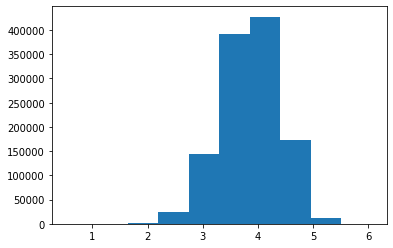

In [8]:
import matplotlib.pyplot as plt
plt.hist(final_preds)
plt.show()

In [9]:
import datetime
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H.%M.%S")
with open("./data/submissions/" + "ensemble_svp" + "_" + timestamp + ".csv", "w") as f:
    f.write("Id,Prediction\n")
    for (user, movie, pred) in zip(test_users, test_movies, final_preds):
        f.write("r{}_c{},{}\n".format(user + 1, movie + 1, pred))